<a href="https://colab.research.google.com/github/satyambhatt5/Satyam/blob/main/Time_series_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
airline =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practice Data Set/AirPassengers.csv',index_col=0,parse_dates=True)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airline.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


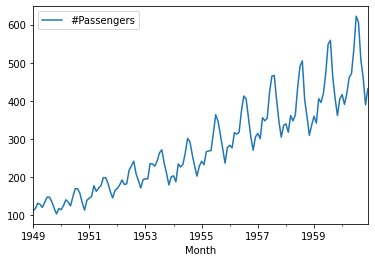

In [ ]:
airline[['#Passengers']].plot();

In [ ]:
#here we are not able find the exact the component 
#sp that we will  use the ETS DECOMPOSTION 



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


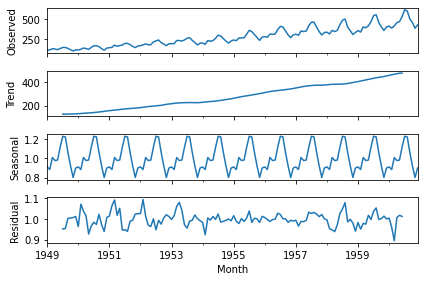

In [ ]:
result=seasonal_decompose(airline['#Passengers'],model='multiplicative') #addtive if it is linear then then we use the addtive 
result.plot();


In [ ]:
#augument dicky fuller test 

from statsmodels.tsa.stattools import adfuller
print('Augument dickey.fullar test on airline Data')
dfest=adfuller(airline['#Passengers'],autolag='AIC')
dfest




Augument dickey.fullar test on airline Data


(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [ ]:
print('Augument dickey.fullar test on airline Data')
dfout=pd.Series(dfest[0:4],index=['ADF test statistic','p-value','#lags used','# observations'])
for key,val in  dfest[4].items():
  dfout['f critical value({key})']=val

Augument dickey.fullar test on airline Data


In [ ]:
print(dfout)

ADF test statistic           0.815369
p-value                      0.991880
#lags used                  13.000000
# observations             130.000000
f critical value({key})     -2.578770
dtype: float64


In [ ]:
#ACF Plots 

#plotting the magnitude of autocorrelation  first few lag(20-40) lot says about the time series  


al =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practice Data Set/AirPassengers.csv',index_col='Month',parse_dates=True)
al.index.freq='MS'
al.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_acf
acf(al['#Passengers'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

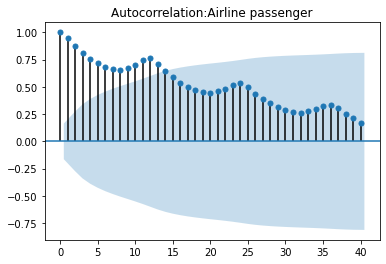

In [ ]:
title ='Autocorrelation:Airline passenger'
lags=40
plot_acf(al,title=title,lags=lags);

In [ ]:
from statsmodels.tsa.statespace.tools import diff
al['dl']= diff(al['#Passengers'],k_diff=1)



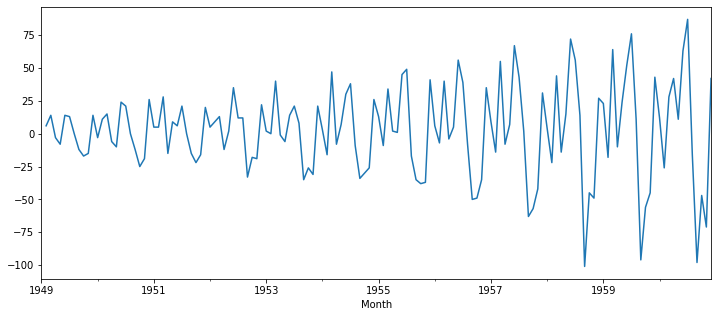

In [ ]:
al['dl'].plot(figsize=(12,5));

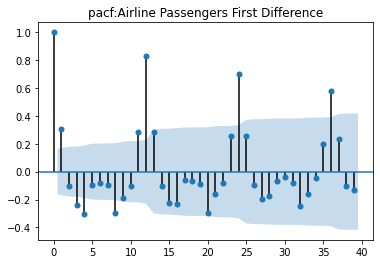

In [ ]:
title='pacf:Airline Passengers First Difference'
lag=40
plot_acf(al['dl'].dropna(),title=title,lags=np.arange(lags));